In [7]:
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import pyodbc
import sqlite3
import seaborn as sns 

In [8]:
if os.path.exists('Sentinelle_foret.db'):
    os.remove('Sentinelle_foret.db')
connection = sqlite3.connect('Sentinelle_foret.db')
cursor = connection.cursor()
cursor.execute('''CREATE TABLE Sentinelle_01 ('Date', 'Heure', 'Temperatur_ambiante', 'Air_humydity%','Atmospheric_pressur(hPa)','Ground_conductivity(dS/m)', 'Ground_temperatur(.C)', 'VWC_Ground_calibration','Humectation_foliaire(V)')''')

In [9]:
folder = "/Users/iron-man/Desktop/Sentinelles/sent2"
files = []
for file in os.listdir(folder):
    files.append(folder+"/"+file)
files = sorted(files)
combined_csv_data = pd.concat([pd.read_csv(f) for f in files],ignore_index=True)

combined_csv_data.head()

Date  Heure  Temperature de l'air (.C)  Humidite de l'air (%)  \
0  14062021   1537                      39.76                  32.59   
1  14062021   1600                      40.53                  31.03   
2  14062021   1601                      40.50                  29.10   
3  14062021   1631                      39.04                  33.17   
4  14062021   1700                      41.14                  29.47   

   Pression Atmospherique (hPa)  Conductivite du sol (dS/m)  \
0                       1014.50                          50   
1                       1014.44                          49   
2                       1014.51                          50   
3                       1014.40                          51   
4                       1014.28                          52   

   Temperature du sol (.C)  Calibration VWC du sol  Humectation foliaire (V)  
0                     27.7                0.149072                   1.03712  
1                     26.4                0.149871                   1.03706  
2                     26.4                0.146756                   1.03681  
3                     25.6                0.162167                   1.03456  
4                     25.2                0.149646                   1.03081

In [10]:
combined_csv_data.columns = ['Date', 'Heure', 'Temperatur_ambiante', 'Air_humydity%','Atmospheric_pressur(hPa)','Ground_conductivity(dS/m)', 'Ground_temperatur(.C)', 'VWC_Ground_calibration','Humectation_foliaire(V)']
combined_csv_data.head()
combined_csv_data.dropna(how='any',axis=0)

Date  Heure  Temperatur_ambiante  Air_humydity%  \
0    14062021   1537                39.76          32.59   
1    14062021   1600                40.53          31.03   
2    14062021   1601                40.50          29.10   
3    14062021   1631                39.04          33.17   
4    14062021   1700                41.14          29.47   
..        ...    ...                  ...            ...   
133  17062021    730                18.69         100.00   
134  17062021    800                18.97         100.00   
135  17062021    830                20.81         100.00   
136  17062021    900                21.34         100.00   
137  17062021    930                22.89         100.00   

     Atmospheric_pressur(hPa)  Ground_conductivity(dS/m)  \
0                     1014.50                         50   
1                     1014.44                         49   
2                     1014.51                         50   
3                     1014.40                         51   
4                     1014.28                         52   
..                        ...                        ...   
133                   1008.04                         63   
134                   1007.55                         62   
135                   1007.56                         61   
136                   1007.54                         61   
137                   1007.16                         62   

     Ground_temperatur(.C)  VWC_Ground_calibration  Humectation_foliaire(V)  
0                     27.7                0.149072                  1.03712  
1                     26.4                0.149871                  1.03706  
2                     26.4                0.146756                  1.03681  
3                     25.6                0.162167                  1.03456  
4                     25.2                0.149646                  1.03081  
..                     ...                     ...                      ...  
133                   24.1                0.157536                  1.06063  
134                   24.1                0.160410                  1.06006  
135                   24.0                0.158055                  1.05744  
136                   23.8                0.158393                  1.04469  
137                   23.9                0.157904                  1.05275  

[138 rows x 9 columns]

In [11]:
corelation_matrix = combined_csv_data.corr()
corelation_matrix.head()

Date     Heure  Temperatur_ambiante  \
Date                      1.000000 -0.473350            -0.486549   
Heure                    -0.473350  1.000000             0.619286   
Temperatur_ambiante      -0.486549  0.619286             1.000000   
Air_humydity%             0.573481 -0.652335            -0.967744   
Atmospheric_pressur(hPa) -0.762818 -0.076260             0.176854   

                          Air_humydity%  Atmospheric_pressur(hPa)  \
Date                           0.573481                 -0.762818   
Heure                         -0.652335                 -0.076260   
Temperatur_ambiante           -0.967744                  0.176854   
Air_humydity%                  1.000000                 -0.268453   
Atmospheric_pressur(hPa)      -0.268453                  1.000000   

                          Ground_conductivity(dS/m)  Ground_temperatur(.C)  \
Date                                       0.925087              -0.332044   
Heure                                     -0.206114              -0.011924   
Temperatur_ambiante                       -0.345061              -0.208963   
Air_humydity%                              0.425398               0.165384   
Atmospheric_pressur(hPa)                  -0.825809               0.212763   

                          VWC_Ground_calibration  Humectation_foliaire(V)  
Date                                    0.672414                 0.582600  
Heure                                  -0.090566                -0.552302  
Temperatur_ambiante                    -0.278220                -0.817173  
Air_humydity%                           0.334941                 0.789639  
Atmospheric_pressur(hPa)               -0.652206                -0.201857

In [12]:
combined_csv_data.to_sql('Sentinelle_01', connection, if_exists='append', index = False)

In [13]:
df = pd.read_sql_query("SELECT * from Sentinelle_01", connection)
df.head()

Date  Heure  Temperatur_ambiante  Air_humydity%  \
0  14062021   1537                39.76          32.59   
1  14062021   1600                40.53          31.03   
2  14062021   1601                40.50          29.10   
3  14062021   1631                39.04          33.17   
4  14062021   1700                41.14          29.47   

   Atmospheric_pressur(hPa)  Ground_conductivity(dS/m)  Ground_temperatur(.C)  \
0                   1014.50                         50                   27.7   
1                   1014.44                         49                   26.4   
2                   1014.51                         50                   26.4   
3                   1014.40                         51                   25.6   
4                   1014.28                         52                   25.2   

   VWC_Ground_calibration  Humectation_foliaire(V)  
0                0.149072                  1.03712  
1                0.149871                  1.03706  
2                0.146756                  1.03681  
3                0.162167                  1.03456  
4                0.149646                  1.03081

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

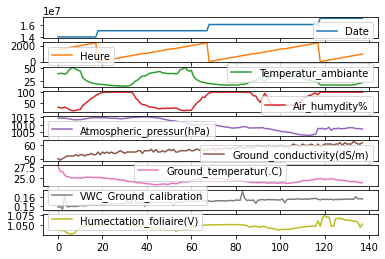

In [14]:
df.plot(subplots=True)

In [16]:
def select_all_tasks(conn, table, limit):
    cur = conn.cursor()
    cur.execute(f"SELECT * FROM (SELECT * FROM {table} DESC LIMIT {limit})")
    rows = cur.fetchall()
    for row in rows:
        print(row)

In [17]:
select_all_tasks(connection, 'Sentinelle_01', 10)

(14062021, 1537, 39.76, 32.59, 1014.5, 50, 27.7, 0.149072, 1.03712)
(14062021, 1600, 40.53, 31.03, 1014.44, 49, 26.4, 0.149871, 1.03706)
(14062021, 1601, 40.5, 29.1, 1014.51, 50, 26.4, 0.146756, 1.03681)
(14062021, 1631, 39.04, 33.17, 1014.4, 51, 25.6, 0.162167, 1.03456)
(14062021, 1700, 41.14, 29.47, 1014.28, 52, 25.2, 0.149646, 1.03081)
(14062021, 1730, 47.17, 22.34, 1013.96, 52, 25.2, 0.14958, 1.02906)
(14062021, 1800, 50.65, 18.79, 1013.6, 52, 24.9, 0.150356, 1.02819)
(14062021, 1830, 51.7, 16.94, 1013.5, 52, 25.0, 0.149778, 1.02925)
(14062021, 1900, 48.71, 19.09, 1013.37, 53, 24.9, 0.14982, 1.03456)
(14062021, 1930, 46.45, 21.91, 1013.46, 52, 25.0, 0.150057, 1.03956)


In [49]:
import names
from uuid import uuid1
import numpy as np
import random
import string
import datetime
import pandas as pd
import numpy as np

def id_generator(size=9):
    chars=string.ascii_uppercase + string.digits
    return ''.join(random.choice(chars) for _ in range(size))

todays_date = datetime.datetime.now().date()
index = pd.date_range(todays_date-datetime.timedelta(30), periods=20, freq='D')
df = pd.DataFrame(columns=["ID","Username","password",""],index=index)
for index, row in df.iterrows():
    unique_id = str(uuid1())
    df.at[index,'ID'] = id_generator()
    df.at[index,'Username'] = names.get_first_name(gender='female')
    df.at[index,'password'] = ''.join(random.choice(string.printable) for i in range(8))

df.head(5)

ID  Username   password     
2021-05-27  NEKUHSO60    Soraya   :l
WR%Ge  NaN
2021-05-28  VZ58VMQPO     Ethel   dh1<H(Fu  NaN
2021-05-29  SR3IP8CY4      Judy   |3dOLhDe  NaN
2021-05-30  M0J56DR8G    Carrie  Aq`E}`o\r  NaN
2021-05-31  IU2W0U6CI  Jennifer   [w;\DMh&  NaN